Text(0.5, 0, '조아조아조아')

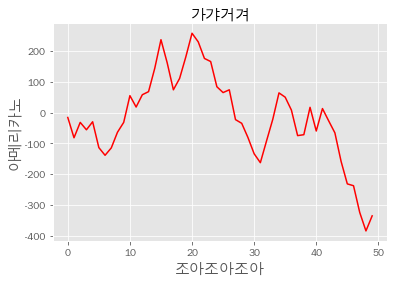

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')

#마이너스폰트깨짐방지
mpl.rcParams[ 'axes.unicode_minus' ] = False

data = np.random.randint(-100, 100, 50).cumsum()
data

#폰트적용방법-1.FontProperties사용
font_path = '/usr/share/fonts/truetype/unfonts-core/UnDotum.ttf'
fontProp = fm.FontProperties(fname = font_path, size=15)

plt.plot(range(50), data, 'r')
plt.title('가갸거겨', fontproperties = fontProp)
plt.ylabel('아메리카노', fontproperties = fontProp)
plt.xlabel('조아조아조아', fontproperties = fontProp)

In [16]:
#설정파일위치확인
print('버전', mpl.__version__)
print('설치 위치', mpl.__file__)
print('설정 위치', mpl.get_configdir())
print('캐시 위치', mpl.get_cachedir())
print('설정 파일 위치', mpl.matplotlib_fname())

#모든ttf폰트
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

print(len(font_list))
print(font_list)

버전 3.1.2
설치 위치 /usr/local/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치 /root/.config/matplotlib
캐시 위치 /root/.cache/matplotlib
설정 파일 위치 /usr/local/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
55
['/usr/share/fonts/truetype/unfonts-core/UnDotumBold.ttf', '/usr/share/fonts/truetype/lyx/cmsy10.ttf', '/usr/share/fonts/truetype/ttf-bitstream-vera/VeraMoIt.ttf', '/usr/share/fonts/truetype/lyx/msam10.ttf', '/usr/share/fonts/truetype/ttf-bitstream-vera/VeraMoBI.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/unfonts-core/UnGraphic.ttf', '/usr/share/fonts/truetype/unfonts-core/UnPilgi.ttf', '/usr/share/fonts/truetype/lyx/stmary10.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed.ttf', '/usr/share/fonts/truetype/unfonts-core/UnDinaruLight.ttf', '/usr/share/fonts/truetype/lyx/cmmi10.ttf', '/usr/share/fonts/truetype/lyx/esint10.ttf', '/usr/share/fonts/truetype/lyx/msbm10.ttf', '/usr/share/fonts/truetype/ttf-bitst

In [17]:
#'Un'으로 시작하는 폰트
f = [(f.name, f.fname) for f in fm.fontManager.ttflist if f.name[:2] == 'Un']
print(len(font_list))

f[:10]

55


[('UnGraphic', '/usr/share/fonts/truetype/unfonts-core/UnGraphicBold.ttf'),
 ('UnDinaru', '/usr/share/fonts/truetype/unfonts-core/UnDinaru.ttf'),
 ('UnPilgi', '/usr/share/fonts/truetype/unfonts-core/UnPilgi.ttf'),
 ('UnDinaru', '/usr/share/fonts/truetype/unfonts-core/UnDinaruLight.ttf'),
 ('UnGungseo', '/usr/share/fonts/truetype/unfonts-core/UnGungseo.ttf'),
 ('UnBatang', '/usr/share/fonts/truetype/unfonts-core/UnBatangBold.ttf'),
 ('UnGraphic', '/usr/share/fonts/truetype/unfonts-core/UnGraphic.ttf'),
 ('UnBatang', '/usr/share/fonts/truetype/unfonts-core/UnBatang.ttf'),
 ('UnDotum', '/usr/share/fonts/truetype/unfonts-core/UnDotum.ttf'),
 ('UnDinaru', '/usr/share/fonts/truetype/unfonts-core/UnDinaruBold.ttf')]

default 폰트 사이즈 :  10.0
default 폰트 :  ['UnDotum']
default 폰트 :  ['UnDotum']


Text(0.5, 0, '시러시러시러')

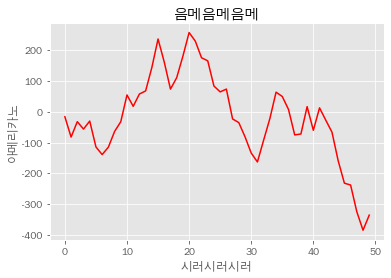

In [18]:
#matplotlib.rcParams[]을 사용한 전역 폰트 설정
print("default 폰트 사이즈 : ", plt.rcParams['font.size'])
print("default 폰트 : ", plt.rcParams['font.family'])

plt.rcParams['font.family'] = 'UnDotum'
print("default 폰트 : ", plt.rcParams['font.family'])

plt.plot(range(50), data, 'r')
plt.title('음메음메음메')
plt.ylabel('아메리카노')
plt.xlabel('시러시러시러')

In [19]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [21]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [22]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [23]:
train.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

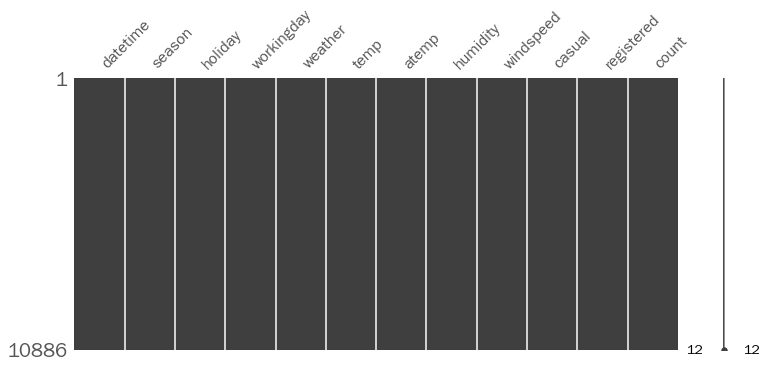

In [25]:
import missingno as msno

msno.matrix(train, figsize=(12,5))

In [26]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [27]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,0,0


[Text(0, 0.5, 'Count'), Text(0.5, 1.0, '시간별 대여량')]

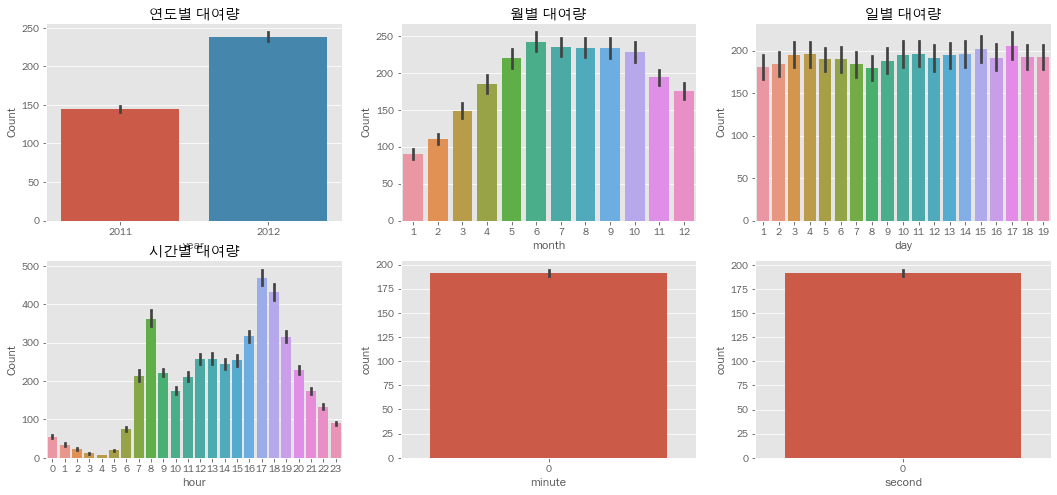

In [28]:
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count', title="연도별 대여량")
ax2.set(ylabel='Count', title="월별 대여량")
ax3.set(ylabel='Count', title="일별 대여량")
ax4.set(ylabel='Count', title="시간별 대여량")